# Сравнение моделей

## Импорты и генерация данных

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from statsmodels.regression.linear_model import OLS

In [2]:
X = np.random.randn(1000, 2)
w = np.array([1, 1])
y = np.dot(X, w) + np.random.randn(1000) * 0.1
noise = np.random.randn(1000)

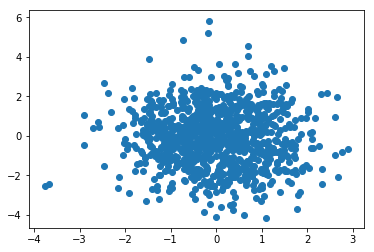

In [3]:
plt.scatter(noise, y)

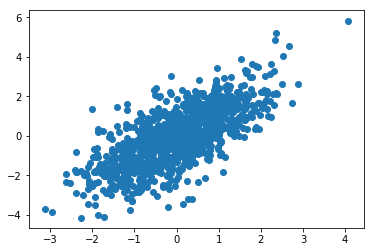

In [4]:
plt.scatter(X[:, 0], y)

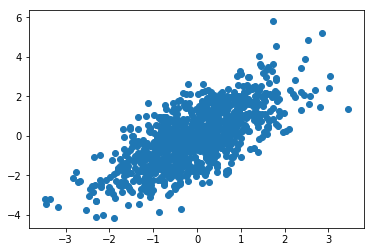

In [5]:
plt.scatter(X[:, 1], y)

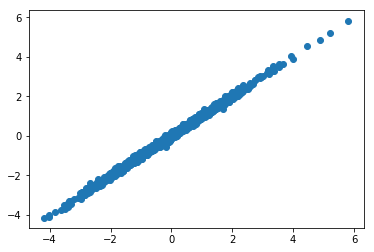

In [6]:
plt.scatter(np.sum(X, 1), y)

## Линейная регрессия

### Модель без шума из одного признака

#### Инициализация через аргументы

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
simple_model = OLS(y, X[:, 0]).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              1073.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                   1.87e-160
Time:                        18:25:11   Log-Likelihood:                         -1440.2
No. Observations:                1000   AIC:                                      2882.
Df Residuals:                     999   BIC:                                      2887.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0205      0.031     32.759      0.000       0.959       1.082
==============================================================================
Omnibus:                        4.613   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                5.580
Skew:                          -0.009   Prob(JB):                       0.0614
Kurtosis:                       3.366   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Инициализация через формулы

In [9]:
simple_model = OLS.from_formula('y ~ x1 - 1', {'y' : y, 'x1' : X[:, 0]}).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              1073.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                   1.87e-160
Time:                        18:26:09   Log-Likelihood:                         -1440.2
No. Observations:                1000   AIC:                                      2882.
Df Residuals:                     999   BIC:                                      2887.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0205      0.031     32.759      0.000       0.959       1.082
==============================================================================
Omnibus:                        4.613   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                5.580
Skew:                          -0.009   Prob(JB):                       0.0614
Kurtosis:                       3.366   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Модель шума

In [10]:
noise_model = OLS(y, noise).fit()
noise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8361
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.361
Time:                        18:26:16   Log-Likelihood:                         -1804.6
No. Observations:                1000   AIC:                                      3611.
Df Residuals:                     999   BIC:                                      3616.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0433      0.047     -0.914      0.361      -0.136       0.050
==============================================================================
Omnibus:                        2.585   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.446
Skew:                           0.112   Prob(JB):                        0.294
Kurtosis:                       3.091   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Модель без шума из двух признаков

In [11]:
complex_model = OLS.from_formula('y ~ x1 + x2 - 1', {'y' :  y, 'x1' : X[:, 0], 'x2' : X[:, 1]}).fit()
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.161e+05
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:26:20   Log-Likelihood:                          921.96
No. Observations:                1000   AIC:                                     -1840.
Df Residuals:                     998   BIC:                                     -1830.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0023      0.003    341.279      0.000       0.997       1.008
x2             1.0082      0.003    333.814      0.000       1.002       1.014
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.089
Skew:                           0.020   Prob(JB):                        0.957
Kurtosis:                       2.977   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Сравнение вложенных моделей

Каждый тест возвращает:

- значение статистики (так как, мы исследуем важность только одного признака, F-критерий эквивалентен критерию Стьюдента для двусторонней альтернативы)
- p-value
- разница в количестве степеней свободы между моделями

#### Критерий Фишера

In [12]:
complex_model.compare_f_test(simple_model)

(111431.89865985364, 0.0, 1.0)

#### Критерий отношения правдоподобия ($H_0$: равенство правдоподобий двух моделей)

In [13]:
complex_model.compare_lr_test(simple_model)

(4724.331907069786, 0.0, 1.0)

#### Критерий Бройша-Пагана (множителей Лагранжа)

In [14]:
complex_model.compare_lm_test(simple_model)

(991.1233576486686, 1.5266397475959995e-217, 1.0)

Нулевая гипотеза об отсутствии влияния второго признака на целевую переменную отвергается

### Добавим шум

In [15]:
from statsmodels.regression.linear_model import OLS
complex_model2 = OLS.from_formula('y ~ x1 + x2 + noise - 1',
                                  {
                                      'y' : y,
                                      'noise' : noise,
                                      'x1' : X[:, 0],
                                      'x2' : X[:, 1]
                                  }).fit()
complex_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          7.736e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:33:13   Log-Likelihood:                          922.18
No. Observations:                1000   AIC:                                     -1838.
Df Residuals:                     997   BIC:                                     -1824.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0024      0.003    340.762      0.000       0.997       1.008
x2             1.0081      0.003    333.698      0.000       1.002       1.014
noise          0.0021      0.003      0.662      0.508      -0.004       0.008
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.085
Skew:                           0.017   Prob(JB):                        0.959
Kurtosis:                       2.972   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
complex_model2.compare_lm_test(complex_model)

(0.438901174454048, 0.5076532889805297, 1.0)

In [17]:
complex_model2.compare_lm_test(noise_model)

(995.718845197069, 6.058986738139582e-217, 2.0)

In [18]:
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.161e+05
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:33:23   Log-Likelihood:                          921.96
No. Observations:                1000   AIC:                                     -1840.
Df Residuals:                     998   BIC:                                     -1830.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0023      0.003    341.279      0.000       0.997       1.008
x2             1.0082      0.003    333.814      0.000       1.002       1.014
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.089
Skew:                           0.020   Prob(JB):                        0.957
Kurtosis:                       2.977   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.161e+05
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:35:10   Log-Likelihood:                          921.96
No. Observations:                1000   AIC:                                     -1840.
Df Residuals:                     998   BIC:                                     -1830.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0023      0.003    341.279      0.000       0.997       1.008
x2             1.0082      0.003    333.814      0.000       1.002       1.014
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.089
Skew:                           0.020   Prob(JB):                        0.957
Kurtosis:                       2.977   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
noise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8361
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.361
Time:                        18:35:10   Log-Likelihood:                         -1804.6
No. Observations:                1000   AIC:                                      3611.
Df Residuals:                     999   BIC:                                      3616.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0433      0.047     -0.914      0.361      -0.136       0.050
==============================================================================
Omnibus:                        2.585   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.446
Skew:                           0.112   Prob(JB):                        0.294
Kurtosis:                       3.091   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Выбор моделей: случай невложенных моделей

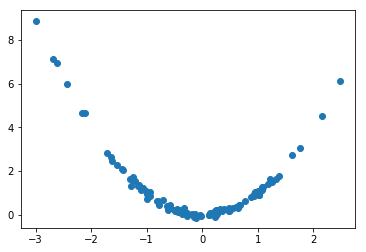

In [21]:
X = np.random.randn(100)
y = X**2 + np.random.randn(100) * 0.1
plt.scatter(X, y)

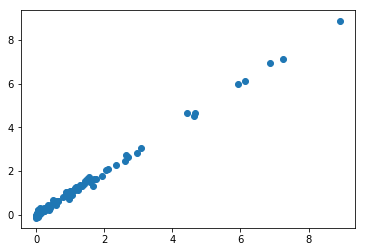

In [22]:
plt.scatter(X ** 2, y)

### Линейная модель

In [23]:
model1 = OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.152
Model:                            OLS   Adj. R-squared (uncentered):              0.144
Method:                 Least Squares   F-statistic:                              17.79
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                    5.47e-05
Time:                        18:35:39   Log-Likelihood:                         -205.34
No. Observations:                 100   AIC:                                      412.7
Df Residuals:                      99   BIC:                                      415.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7351      0.174     -4.218      0.000      -1.081      -0.389
==============================================================================
Omnibus:                       59.124   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.169
Skew:                           2.180   Prob(JB):                     1.02e-40
Kurtosis:                       8.019   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Квадратичная модель

In [24]:
model2 = OLS(y, X ** 2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.088e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                   2.33e-131
Time:                        18:35:43   Log-Likelihood:                          87.684
No. Observations:                 100   AIC:                                     -173.4
Df Residuals:                      99   BIC:                                     -170.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9955      0.005    202.180      0.000       0.986       1.005
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.880
Skew:                          -0.227   Prob(JB):                        0.391
Kurtosis:                       3.496   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Предсказания моделей

In [25]:
y_predicted1 = model1.predict(X)
y_predicted2 = model2.predict(X ** 2)

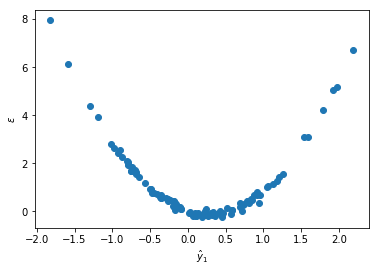

In [26]:
plt.scatter(y_predicted1, y - y_predicted1)
plt.xlabel('$\hat y_1$')
_ = plt.ylabel('$\epsilon$')

Text(0,0.5,'y')

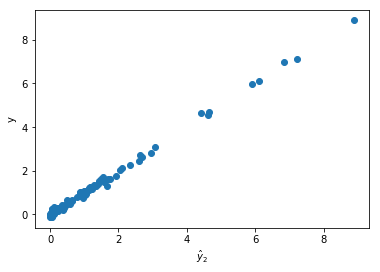

In [27]:
plt.scatter(y_predicted2, y)
plt.xlabel('$\hat y_2$')
plt.ylabel('y')

#### Критерий Давидсона-Маккиннона

In [32]:
data = {'y' : y, 'y1' : y_predicted1, 'y2': y_predicted2, 'X' : X, 'X2' : X ** 2}
model1_with_y_2 = OLS.from_formula('y ~ y2+X', data = data).fit()
model2_with_y_1 = OLS.from_formula('y ~ y1+X2', data = data).fit()

In [29]:
model1_with_y_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.351e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          2.18e-119
Time:                        18:42:00   Log-Likelihood:                 87.903
No. Observations:                 100   AIC:                            -169.8
Df Residuals:                      97   BIC:                            -162.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0081      0.013     -0.651      0.517      -0.033       0.017
y2             1.0025      0.007    153.004      0.000       0.989       1.016
X              0.0010      0.010      0.100      0.921      -0.019       0.021
==============================================================================
Omnibus:                        2.464   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.870
Skew:                          -0.226   Prob(JB):                        0.393
Kurtosis:                       3.494   Cond. No.                         2.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2_with_y_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.351e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          2.18e-119
Time:                        18:43:55   Log-Likelihood:                 87.903
No. Observations:                 100   AIC:                            -169.8
Df Residuals:                      97   BIC:                            -162.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0081      0.013     -0.651      0.517      -0.033       0.017
y1            -0.0014      0.014     -0.100      0.921      -0.029       0.026
X2             0.9980      0.007    153.004      0.000       0.985       1.011
==============================================================================
Omnibus:                        2.464   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.870
Skew:                          -0.226   Prob(JB):                        0.393
Kurtosis:                       3.494   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Кодирование категориальных переменных

In [31]:
data = [1] * 10 + [2] * 7 + [3] * 5
np.random.shuffle(data)
data = np.array(data)
data

array([1, 3, 2, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 3, 2, 1, 2, 2, 3, 1])

### dummy

In [34]:
from patsy.contrasts import Treatment
levels = [1, 2, 3]
contrast = Treatment().code_without_intercept(levels)
print(contrast.matrix)

[[0. 0.]
 [1. 0.]
 [0. 1.]]


In [35]:
contrast.matrix[data - 1]

TypeError: unsupported operand type(s) for -: 'dict' and 'int'

#### deviation

In [36]:
from patsy.contrasts import Sum
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

[[ 1.  0.]
 [ 0.  1.]
 [-1. -1.]]


In [37]:
contrast.matrix[data - 1]

TypeError: unsupported operand type(s) for -: 'dict' and 'int'

# Метод Бокса-Кокса

In [38]:
rs = np.random.RandomState(42)
y = rs.randn(100)
print(np.array(y > 1).sum())

11


Изменим хвост нормального распределения

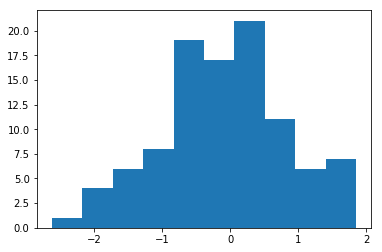

In [39]:
_ = plt.hist(y)

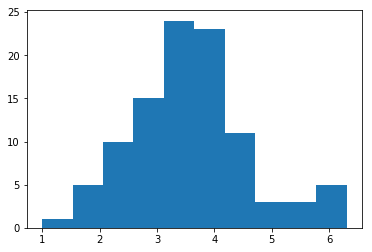

In [40]:
tails = (y) > 1
y[tails] *= 1.45

y = y - np.min(y) + 1
_ = plt.hist(y)

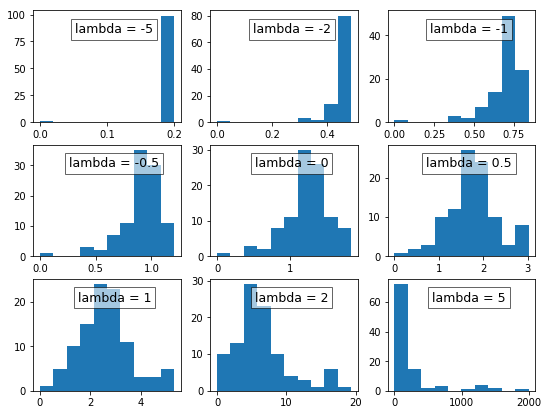

In [41]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)
    return ax

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
lambdas = [-5, -2, -1, -0.5, 0, 0.5, 1, 2, 5]
for i, l in enumerate(lambdas):
    axes[i // 3, i % 3].hist(st.boxcox(y, l))
    add_titlebox(axes[i // 3, i % 3], 'lambda = ' + str(l))

In [42]:
for l in np.arange(-2.0,  2.0, 0.1):    
    print(l, st.shapiro(st.boxcox(y, l)))

-2.0 (0.5157384872436523, 1.3918920521826514e-16)
-1.9 (0.5423719882965088, 3.914205953106718e-16)
-1.7999999999999998 (0.5695182085037231, 1.176184127205809e-15)
-1.6999999999999997 (0.5970176458358765, 3.779649898995926e-15)
-1.5999999999999996 (0.6246939897537231, 1.2990348000844337e-14)
-1.4999999999999996 (0.6523618698120117, 4.773070976546272e-14)
-1.3999999999999995 (0.6798292398452759, 1.8728607260962843e-13)
-1.2999999999999994 (0.7069024443626404, 7.833421411529429e-13)
-1.1999999999999993 (0.733389675617218, 3.4833631205183346e-12)
-1.0999999999999992 (0.7591072916984558, 1.6411877065691804e-11)
-0.9999999999999991 (0.7838813066482544, 8.156253450408713e-11)
-0.899999999999999 (0.8075541853904724, 4.252465324317001e-10)
-0.7999999999999989 (0.8299862146377563, 2.310562408069927e-09)
-0.6999999999999988 (0.8510535955429077, 1.2973270457905528e-08)
-0.5999999999999988 (0.8706591129302979, 7.453459005546392e-08)
-0.49999999999999867 (0.8887221217155457, 4.3268505578453187e-07)


In [43]:
bc, l = st.boxcox(y)
print(f'optimal lambda = {l}')
print('Box-Cox transformed array:')
print(bc)

optimal lambda = 0.6650524604546766
Box-Cox transformed array:
[2.34967566 1.94339332 2.44309507 3.35216838 1.87995815 1.87996907
 3.39720323 2.51640594 1.72167007 2.37816355 1.72579271 1.72421926
 2.18939193 0.64172332 0.79643666 1.65815816 1.34010116 2.23522256
 1.41563252 1.04230086 3.30595495 1.88552376 2.07759462 1.03274647
 1.67046012 2.10556927 1.23895715 2.2739625  1.63172649 1.84160362
 1.63098887 3.61319828 2.0250636  1.30744761 2.54991976 1.18710261
 2.16831071 0.60275787 1.1064171  2.1606511  2.49873321 2.14435529
 1.95826919 1.8353102  0.99125048 1.5488415  1.72768336 2.97016857
 2.25376379 0.76555632 2.24143736 1.77887738 1.57881497 2.42091346
 2.94826921 2.61563878 1.4646879  1.82988228 2.24597007 2.64224134
 1.71506208 1.91211366 1.27185281 1.20544939 2.54383731 3.21721317
 1.98688198 2.92518453 2.26511521 1.60092878 2.26496386 3.3642179
 2.01051797 3.38554503 0.         2.5495299  2.09019124 1.83671277
 2.09322992 0.57914852 1.88957655 2.26226699 3.31583573 1.68835848


## Гетероскедастичность

1.0


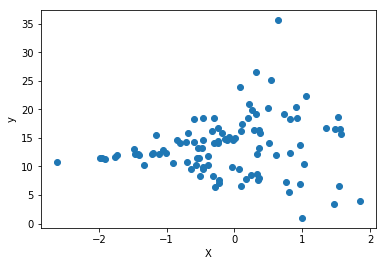

In [44]:
rs = np.random.RandomState(42)
X = rs.randn(100)
X.sort()
error = rs.randn(100) * 0.1 * np.arange(100)
y = X + error
y = y - np.min(y) + 1
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
print(y.min())

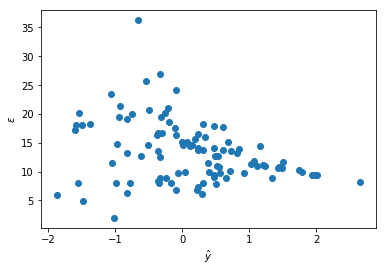

In [45]:
model = OLS(y, X).fit()
predicted = model.predict(X)
plt.scatter(predicted, y - predicted)
plt.xlabel('$\hat y$')
_ = plt.ylabel('$\epsilon$')

### Преобразование Бокса-Кокса вручную

In [46]:
def W(y, lam):
    if lam == 0: return np.log(y)
    else: return (y ** lam - 1)/lam

И проверим

In [47]:
for l in [-2, -1, -0.5, 0, 0.5, 1, 2]:
    print (np.sum(W(y, l) - st.boxcox(y, l)))

-5.551115123125783e-17
2.220446049250313e-16
-1.1102230246251565e-15
0.0
-7.105427357601002e-15
-1.509903313490213e-14
-4.760636329592671e-13


35.61563235597085


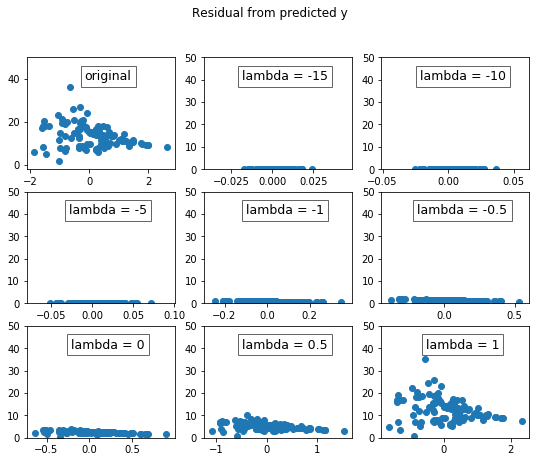

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
fig.suptitle('Residual from predicted y')

model = OLS(y, X).fit()
predicted = model.predict(X)
axes[0, 0].scatter(predicted, y - predicted )
axes[0, 0].set_ylim((-2, 50))
add_titlebox(axes[0, 0], 'original')
print(max(y))
    
lams = [-15, -10, -5, -1, -0.5, 0, 0.5, 1]
for i, l in enumerate(lams):
    i += 1
    model = OLS(W(y, l), X).fit()
    predicted = model.predict(X)
    axes[i // 3, i % 3].scatter(predicted, W(y, l) - predicted)
    add_titlebox(axes[i // 3, i % 3], 'lambda = ' + str(l))
    axes[i // 3, i % 3].set_ylim((0, 50))

-5.0

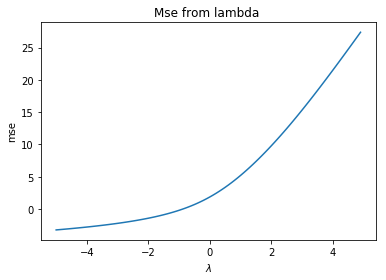

In [49]:
lams = np.arange(-5, 5, 0.1)
r = []
for l in lams:
    model = OLS(W(y, l), X).fit()
    r.append(np.log(model.mse_resid))
plt.plot(lams, r)
plt.xlabel('$\lambda$')
plt.ylabel('mse')
plt.title('Mse from lambda ')
lams[np.argmin(r)]

### Before

In [50]:
model = OLS(y, X).fit()
print(model.mse_resid)

209.91252202039055


In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.4038
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.527
Time:                        18:57:05   Log-Likelihood:                         -408.73
No. Observations:                 100   AIC:                                      819.5
Df Residuals:                      99   BIC:                                      822.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0122      1.593     -0.635      0.527      -4.173       2.148
==============================================================================
Omnibus:                       24.587   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.563
Skew:                           1.053   Prob(JB):                     1.56e-09
Kurtosis:                       5.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After

In [52]:
bc, l = st.boxcox(y)
model = OLS(bc, X).fit()
print(model.mse_resid)

50.53390977431041


In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.7636
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.384
Time:                        18:57:07   Log-Likelihood:                         -337.52
No. Observations:                 100   AIC:                                      677.0
Df Residuals:                      99   BIC:                                      679.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6829      0.782     -0.874      0.384      -2.234       0.868
==============================================================================
Omnibus:                        8.569   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.476
Skew:                           0.587   Prob(JB):                       0.0144
Kurtosis:                       3.809   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model = OLS(W(y, -5), X).fit()
print(model.mse_resid)

0.039362468177660585


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              1.595
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.210
Time:                        18:57:08   Log-Likelihood:                          20.356
No. Observations:                 100   AIC:                                     -38.71
Df Residuals:                      99   BIC:                                     -36.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0275      0.022     -1.263      0.210      -0.071       0.016
==============================================================================
Omnibus:                       57.296   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.591
Skew:                          -1.737   Prob(JB):                     9.91e-73
Kurtosis:                      11.217   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""